# Speech Emotion Recognition


**-Kiran K**

CODE CLAUSE INTERNSHIP

In [9]:
import json

In [10]:
with open('/content/kaggle.json', 'r') as json_file:
    data = json.load(json_file)

In [11]:
username = data['username']
key= data['key']

In [12]:
import os

In [13]:
os.environ['KAGGLE_USERNAME'] =username
os.environ['KAGGLE_KEY'] =key

In [14]:
!pip install kaggle

In [15]:
!kaggle datasets download -d uwrfkaggler/ravdess-emotional-speech-audio

 99% 425M/429M [00:05<00:00, 105MB/s] 
100% 429M/429M [00:05<00:00, 79.9MB/s]


In [16]:
!unzip /content/ravdess-emotional-speech-audio.zip

Archive:  /content/ravdess-emotional-speech-audio.zip
  inflating: Actor_01/03-01-01-01-01-01-01.wav  
  inflating: Actor_01/03-01-01-01-01-02-01.wav  
  inflating: Actor_01/03-01-01-01-02-01-01.wav  
  inflating: Actor_01/03-01-01-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-01-01-01-01.wav  
  inflating: Actor_01/03-01-02-01-01-02-01.wav  
  inflating: Actor_01/03-01-02-01-02-01-01.wav  
  inflating: Actor_01/03-01-02-01-02-02-01.wav  
  inflating: Actor_01/03-01-02-02-01-01-01.wav  
  inflating: Actor_01/03-01-02-02-01-02-01.wav  
  inflating: Actor_01/03-01-02-02-02-01-01.wav  
  inflating: Actor_01/03-01-02-02-02-02-01.wav  
  inflating: Actor_01/03-01-03-01-01-01-01.wav  
  inflating: Actor_01/03-01-03-01-01-02-01.wav  
  inflating: Actor_01/03-01-03-01-02-01-01.wav  
  inflating: Actor_01/03-01-03-01-02-02-01.wav  
  inflating: Actor_01/03-01-03-02-01-01-01.wav  
  inflating: Actor_01/03-01-03-02-01-02-01.wav  
  inflating: Actor_01/03-01-03-02-02-01-01.wav  
  inflating: Ac

In [23]:
import numpy as np
import pandas as pd
import os
import librosa
import wave
import matplotlib.pyplot as plt

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop
from tensorflow.python.keras import regularizers

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [24]:
def extract_mfcc(wav_file_name):

    y, sr = librosa.load(wav_file_name,duration=3,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)

    return mfccs

In [25]:
radvess_speech_labels = []
ravdess_speech_data = []
for dirname, _, filenames in os.walk('/content/audio_speech_actors_01-24'):
    for filename in filenames:

        radvess_speech_labels.append(int(filename[7:8]) - 1)
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name))

print("Finish Loading the Dataset")

Finish Loading the Dataset


In [26]:
ravdess_speech_data_array = np.asarray(ravdess_speech_data)
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(1440, 8)

In [27]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical,
                                                test_size=0.20, random_state=9)

In [28]:
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [29]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(16, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(16))
    model.add(Dropout(0.5))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [30]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)
w.shape

(1152, 40, 1)

In [31]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1),
                      labels_categorical[:training_samples],
                      validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]),
                      epochs=50, callbacks=[es_callback])


Epoch 1/50
36/36 [==============================] - 4s 40ms/step - loss: 2.0807 - accuracy: 0.1181 - val_loss: 2.0605 - val_accuracy: 0.1806
Epoch 2/50
36/36 [==============================] - 1s 19ms/step - loss: 2.0622 - accuracy: 0.1580 - val_loss: 2.0515 - val_accuracy: 0.1806
Epoch 3/50
36/36 [==============================] - 1s 21ms/step - loss: 2.0509 - accuracy: 0.1710 - val_loss: 2.0470 - val_accuracy: 0.1736
Epoch 4/50
36/36 [==============================] - 1s 22ms/step - loss: 2.0488 - accuracy: 0.1710 - val_loss: 2.0387 - val_accuracy: 0.1528
Epoch 5/50
36/36 [==============================] - 1s 20ms/step - loss: 2.0399 - accuracy: 0.1736 - val_loss: 2.0307 - val_accuracy: 0.1667
Epoch 6/50
36/36 [==============================] - 1s 21ms/step - loss: 2.0443 - accuracy: 0.1944 - val_loss: 2.0239 - val_accuracy: 0.1806
Epoch 7/50
36/36 [==============================] - 1s 20ms/step - loss: 2.0316 - accuracy: 0.1962 - val_loss: 2.0069 - val_accuracy: 0.1944
Epoch 8/50
36

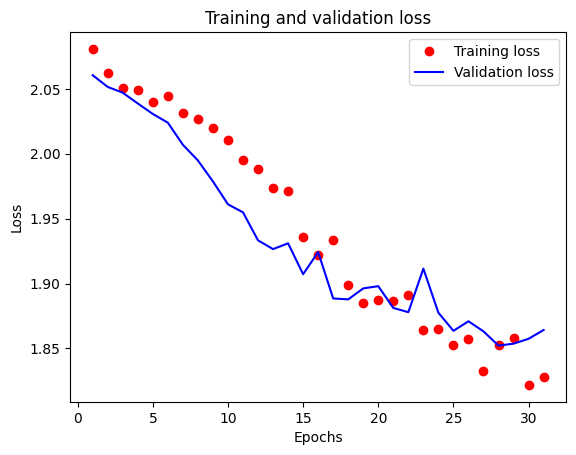

In [32]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

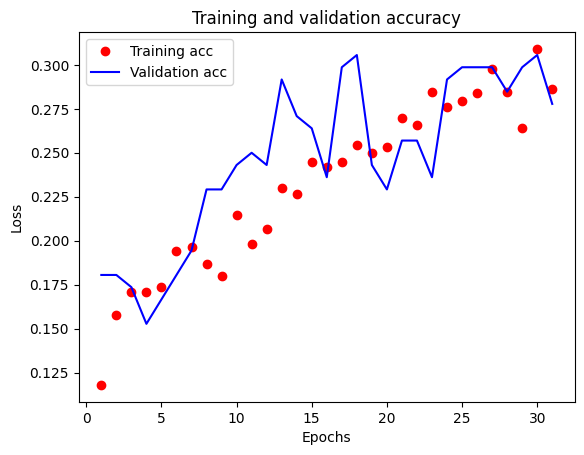

In [33]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
model_A.save_weights("Model_LSTM.h5")


In [57]:
path_ = '/content/audio_speech_actors_01-24/Actor_24/03-01-08-02-02-02-24.wav'


In [58]:
import IPython.display as ipd
ipd.Audio(path_)

In [59]:
a = extract_mfcc(path_)
a.shape
a1 = np.asarray(a)
a1.shape

(40,)

In [60]:
q = np.expand_dims(a1,-1)
qq = np.expand_dims(q,0)
qq.shape

(1, 40, 1)

In [61]:
pred = model_A.predict(qq)
pred

1/1 [==============================] - 0s 27ms/step


array([[0.03900555, 0.01881579, 0.13376027, 0.10983235, 0.17740633,
        0.09989949, 0.13601202, 0.28526825]], dtype=float32)

In [62]:
preds=pred.argmax()
preds

7

In [64]:
if (preds==0):
  print("This is a neutral emotion")
elif (preds==1):
  print("This is a calm emotion")
elif (preds==2):
  print("This is a happy emotion")
elif (preds==3):
  print("This is a sad emotion")
elif (preds==4):
  print("This is a angry emotion")
elif (preds==5):
  print("This is a fearful emotion")
elif (preds==6):
  print("This is a disgust emotion")
else:
  print("This is a surprised emotion")


This is a surprised emotion
